(stability-exercises-section)=

# Stability exercises

````{exercise}
:label: ch4-ex-erk-stability-function

Determine the stability function of the following Runge-Kutta method

$$ \begin{array}{c|ccccc}
    0 & 0 &  &  &  & \\
    \frac{1}{4} & \frac{1}{4} &  &  &  & \\
    \frac{1}{2} & \frac{1}{2} & 0 &  &  & \\
    3/4 & 0 & \frac{1}{2} & \frac{1}{4} &  &    \\
    0 & 0 & \frac{1}{6} & -\frac{1}{3} & \frac{1}{6} & \\ \hline
    & -1 & \frac{2}{3} & -\frac{1}{3} & \frac{2}{3} & 1
\end{array} $$

```{dropdown} Solution
$$ R(z) = 1 + z + \frac{1}{2}z + \frac{1}{6}z^3 + \frac{1}{24}z^4 $$
```
````

In [1]:
import sympy as sp

A = sp.Matrix([[0, 0, 0, 0, 0], 
               [sp.Rational(1,4), 0, 0, 0, 0],
               [sp.Rational(1,2), 0, 0, 0, 0],
               [0, sp.Rational(1,2), sp.Rational(1,4), 0, 0],
               [0, sp.Rational(1,6), -sp.Rational(1,3), sp.Rational(1,6), 0]])
b = sp.Matrix([-1, sp.Rational(2,3), -sp.Rational(1,3), sp.Rational(2,3), 1])
e = sp.ones(len(b), 1)

print("R(z) = 1 ", end="")
for k in range(len(b)):
    print(f"+ {(b.T * A ** k * e)[0]} z^{k+1} ", end="")

R(z) = 1 + 1 z^1 + 1/2 z^2 + 1/6 z^3 + 1/24 z^4 + 0 z^5 

````{exercise}
:label: ch4-ex-irk-stability-function

Determine the stability function of the following Runge-Kutta method. Is this an A-stable method?

$$ \begin{array}{c|cc}
    \frac{1}{4} & \frac{7}{24} & -\frac{1}{24} \\
    \frac{3}{4} & \frac{13}{24} & \frac{5}{24} \\ \hline
    & \frac{1}{2} & \frac{1}{2}
\end{array} $$

```{dropdown} Solution
$$R(z) = \frac{1 + \frac{1}{2}z + \frac{1}{12}z^2}{1 - \frac{1}{2}z + \frac{1}{12}z^2}$$

The roots of $Q(z)$ are $3 \pm \sqrt{3}i$ and $E(y) = 0$ so this is an A-stable method.
```

````


In [2]:
A = sp.Matrix([[sp.Rational(7,24), -sp.Rational(1,24)], [sp.Rational(13,24), sp.Rational(5,24)]])
ebT = sp.Matrix([[sp.Rational(1,2), 0], [0, sp.Rational(1,2)]])

def P(z):
  return (sp.eye(2) - z * A + z * ebT).det()

def Q(z):
  return (sp.eye(2) - z * A).det()

z, y = sp.symbols('z y')
R = P(z) / Q(z)
sp.pprint(R)

def E(y):
  return Q(1j * y) * Q(1j * -y) - P(1j * y) * P(1j * -y)

sp.pprint(sp.solve(Q(z)))
sp.pprint(sp.simplify(E(y)))

 2        
z    z    
── + ─ + 1
12   2    
──────────
 2        
z    z    
── - ─ + 1
12   2    
[3 - √3⋅ⅈ, 3 + √3⋅ⅈ]
                      4
4.33680868994202e-18⋅y 


`````{exercise}
:label: ch2-ex-dirk-stability-function

Plot the region of absolute stability for the fourth-order Gauss-Legendre method. What does your plot suggest about the method?

$$ \begin{array}{c|cc}
    \frac{1}{2} - \frac{\sqrt{3}}{6} & \frac{1}{4} & \frac{1}{4} - \frac{\sqrt{3}}{6} \\
    \frac{1}{2} + \frac{\sqrt{3}}{6} & \frac{1}{4} + \frac{\sqrt{3}}{6} & \frac{1}{4} \\ \hline
    & \frac{1}{2} & \frac{1}{2}
\end{array} $$

````{dropdown} Solution
$$R(z) = \frac{1 + \frac{1}{2}z + \frac{1}{12}z^2}{1 - \frac{1}{2}z + \frac{1}{12}z^2}$$

```{glue:figure} GL_stability_region
```

This is an A-stable method.
````
`````

In [3]:
A = sp.Matrix([[sp.Rational(1,4), sp.Rational(1,4) - sp.Rational(1,6) * sp.sqrt(3)], [sp.Rational(1,4) + sp.Rational(1,6) * sp.sqrt(3), sp.Rational(1,4)]])
ebT = sp.Matrix([[sp.Rational(1,2), 0], [0, sp.Rational(1,2)]])

def P(z):
  return (sp.eye(2) - z * A + z * ebT).det()

def Q(z):
  return (sp.eye(2) - z * A).det()

R = P(z) / Q(z)
sp.pprint(R)

 2        
z    z    
── + ─ + 1
12   2    
──────────
 2        
z    z    
── - ─ + 1
12   2    


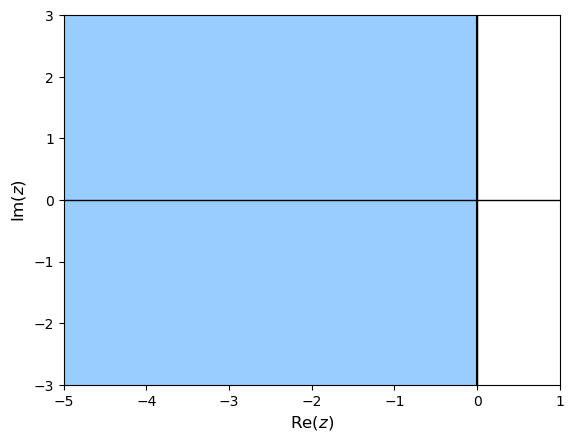

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate z values
xmin, xmax, ymin, ymax = -5, 1, -3, 3
X, Y = np.meshgrid(np.linspace(xmin, xmax, 200),np.linspace(ymin, ymax, 200))
Z = X + Y * 1j

# Define stability function
R = (1 + 1/2 * Z + 1/12 * Z ** 2) / (1 - 1/2 * Z + 1/12 * Z ** 2)

# Plot stability region
fig = plt.figure()
contour = plt.contourf(X, Y, abs(R), levels=[0, 1], colors="#99ccff")  # Plot stability region
plt.contour(X, Y, abs(R), colors= "k", levels=[0, 1])                    # Add outline
plt.axhline(0, color="k", linewidth=1)                                   # Add x-axis line
plt.axvline(0, color="k", linewidth=1)                                   # Add y-axis line
# plt.axis("equal")
plt.axis([xmin, xmax, ymin, ymax])
plt.xlabel("$\mathrm{Re}(z)$", fontsize=12)
plt.ylabel("$\mathrm{Im}(z)$", fontsize=12)
plt.axis([xmin, xmax, ymin, ymax])
plt.show()

from myst_nb import glue
glue("GL_stability_region", fig, display=False)


````{exercise}
:label: ch4-ex-stiffness-ratio

Calculate the stiffness ratio for the following system of ODEs. 

\begin{align*}
    y_1' &= -20y_1 + y_2, \\
    y_2' &= 500 y_2.
\end{align*}

For the Euler method with step size $h = 0.05$, test the stability against both of the Eigenvalues of this system.

```{dropdown} Solution
The eigenvalues are $\lambda_1 = -20$ and $\lambda_2 = -500$ so the stiffness ratio is

$$ S = \frac{-500}{-20} = 25. $$

The stability function for the Euler method is $R(z) = 1 + z = 1 + h \lambda$. For stability, $|1 + h \lambda| \leq 1$. 

For $\lambda_1$, $|R(-25 h)| = |1 - 25(0.05)| = 0 < 1$ so is stable.

For $\lambda_2$, $|R(-500 h)| = |1 - 500(0.05)| = 24 > 1$ so is unstable.
```
````